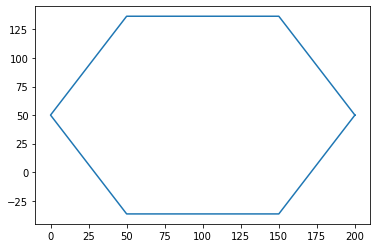

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

#############Plotando um Hexágono###################
#xCentro = float(input("digite o x do centro do hexagono: "))
#yCentro = float(input("digite o y do centro do hexagono: "))

#transforma as coordenas num número complexo
#centro = complex(xCentro,yCentro)

#raio = float(input("Digite o raio do hexagono: "))


def makeHex(centro,raio):
    PontosHex = []
    for i in range(7):
        #Calcula um número complexo que é o ponto
        #ponto = raio*np.exp(np.pi/3*(i-1)*1j)
        ponto = raio*(np.cos(i*math.pi/3) + np.sin(i*math.pi/3)*1j)
        PontosHex.append(ponto)
    #escalona a posição do hexagono para o centro especificado 
    pontosHex = np.asarray(PontosHex)
    #print(pontosHex)
    pontosHex += centro
    #pontosHex = [x + centro for x in pontosHex]
    
    #Divide a parte real e imaginário para o plot
    #X = [Y.real for x in pontosHex]
    #Y = [X.imag for y in pontosHex]
   # X = np.real(pontosHex)
    #Y = np.imag(pontosHex)

    plt.plot(np.real(pontosHex),np.imag(pontosHex))
    #plt.axis('equal')
    plt.autoscale('x')


makeHex(100+50*1j,100)


In [7]:
def desenha_hexes(raio,centros):
    for centro in centros:
        makeHex(centro,raio)
        #plt.axis('equal')
        
        

raio  = 5e3 
#dista_sites = 2*np.sqrt(3/4)*raio   #só para informação
dDimX = 5*raio
dDimY = 6*math.sqrt(3/4)*raio
centros = [0]
offset = math.pi/6

Centros = [0]
for b in range(6):
    centro = raio*np.sqrt(3)*np.exp((b*np.pi/3 + offset)*1j)
    Centros.append(centro)
    
centros = np.asarray(Centros)
centros += complex(dDimX/2,dDimY/2)
#centros = [x + complex(dDimX/2,dDimY/2) for x in centros]  #O mesmo usando lista
#centros.append(complex(dDimX/2,dDimY/2))   # O mesmo usando lista

print(centros)


[12500.+12990.38105677j 20000.+17320.50807569j 12500.+21650.63509461j
  5000.+17320.50807569j  5000. +8660.25403784j 12500. +4330.12701892j
 20000. +8660.25403784j]


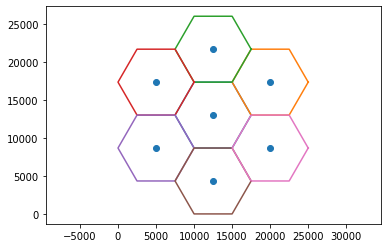

<Figure size 432x216 with 0 Axes>

In [8]:

desenha_hexes(raio,centros)
#X1 = [x.real for x in centros]
#Y1 = [y.imag for y in centros]
X1 = np.real(centros)
Y1 = np.imag(centros)
plt.scatter(X1,Y1)
plt.axis('equal')
plt.figure(figsize=(6,3)) 
plt.show()

#plt.scatter(dDimX/2,dDimY/2)
        

In [10]:

import math

passo = math.ceil(raio/10)
#passo = 500
print(dDimX,dDimY)
dDimY += dDimY % passo
dDimX += dDimX % passo

xx, yy = np.meshgrid( np.linspace(0,dDimX,passo), np.linspace(0,dDimY,passo) )

print(dDimX,dDimY)
#posEachBss = []
#for i in range(7):
   # posBss = (xx + yy*1j) - centros[i]
    #posEachBss.append(posBss)
  #  plt.figure(i)
   # plt.scatter(posEachBss[i].real,posEachBss[i].imag)
  #  plt.title('ERB {}'.format(i+1) )
  #  desenha_hexes(raio, (centros - centros[i]))
  #  plt.show()




25000.0 26461.524227066322
25000.0 26923.048454132644


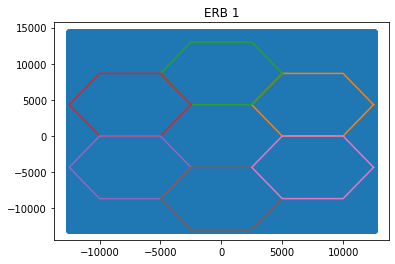

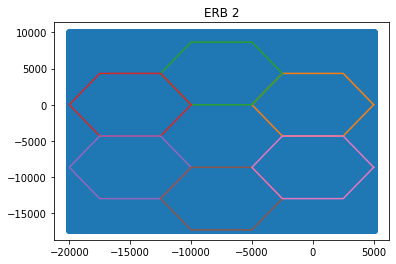

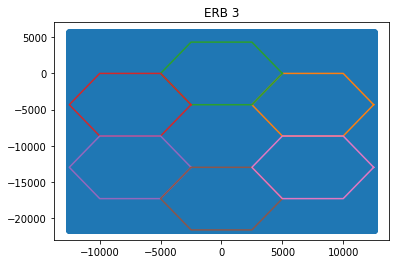

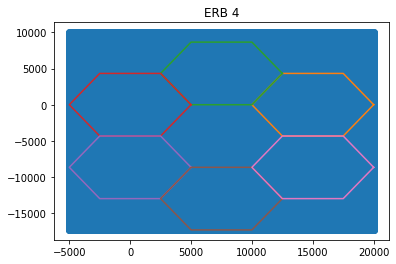

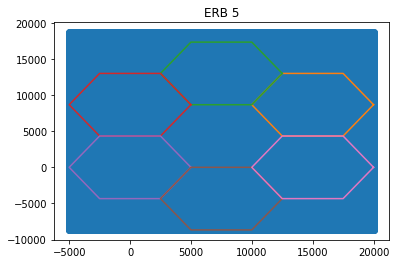

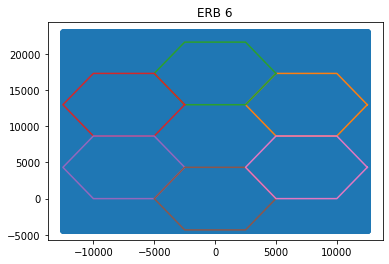

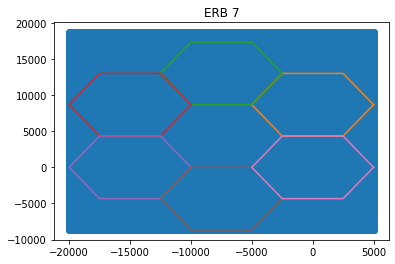

In [63]:
#fc = 800 #MHZ
#rMin = passo #raio de segurança
#mtPotenciasFinalDbm = np.NINF*np.ones(np.size(yy))
#print(mtPotenciasFinalDbm)
#np.shape(mtPotenciasFinalDbm)
#np.size(yy)

posEachBss = []
for centro in centros:
    posBss = (xx + yy*1j) - centro
    posEachBss.append(posBss)
#print(posEachBss)

#print(mtDisEachBsNorm)


#posEachBss = np.array(posEachBss)
#np.shape(mtDisEachBsNorm)

for i in range(7):
    plt.scatter(posEachBss[i].real,posEachBss[i].imag)
    plt.title('ERB {}'.format(i+1) )
    desenha_hexes(raio, (centros - centros[i]))
    #plt.axis('equal')
    plt.show()


In [8]:
#MtPotenciasDbmFinal = np.NINF*np.ones(np.size(dDimY))
mtDisEachBsNorm = np.abs(posEachBss)
dMin = raio
#mtDisEachBsNorm[mtDisEachBsNorm < dMin] = dMin
np.where(mtDisEachBsNorm < dMin, dMin, mtDisEachBsNorm)
hBss = 30
ptDbm = 57                                              
#ptLinear = 10**(ptDbm/10)*1e-3                           
HMob = 5                                                
HBs = 30                                               
Ahm = 3.2*(math.log10(11.75*HMob))**2 - 4.97
fc = 800

mtPldb = 69.55+26.6*math.log10(fc)+(44.9-6.55*math.log10(HBs))*np.log10(mtDisEachBsNorm/1e3) - 13.82*math.log10(HBs) - Ahm
mtPotEachBsdBm = ptDbm - mtPldb
MtPotenciasDbmFinal = np.NINF*np.ones(np.shape(dDimY))


for i in range(7):
    plt.pcolor(xx,yy, mtPotEachBsdBm[i],vmax=-115,vmin=-50)
    plt.colorbar()
    desenha_hexes(raio,centros) 
    plt.title('ERB {}'.format(i+1) )
    #plt.axis('equal')
    plt.show()
    MtPotenciasDbmFinal = np.maximum(MtPotenciasDbmFinal,mtPotEachBsdBm[i])

    

plt.pcolor(xx,yy,MtPotenciasDbmFinal,vmax=-115,vmin=-55)
plt.colorbar()
desenha_hexes(raio,centros)

    
    


    
    

NameError: name 'posEachBss' is not defined

In [1]:
print(plt.size(MtPotenciasDbmFinal))
print((MtPotenciasDbmFinal<-100).sum())

NameError: name 'plt' is not defined